<a href="https://colab.research.google.com/github/YannisZang/CS5805_Machine-Learning/blob/main/ref/ID3_and_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [ ]:
data = [
    ["No.", "Outlook", "Temperature", "Humidity", "Windy", "Class"],
    [1, "sunny", "hot", "high", False, "not"],
    [2, "sunny", "hot", "high", True, "not"],
    [3, "overcast", "hot", "high", False, "yes"],
    [4, "rain", "mild", "high", False, "yes"],
    [5, "rain", "cool", "normal", False, "yes"],
    [6, "rain", "cool", "normal", True, "not"],
    [7, "overcast", "cool", "normal", True, "yes"],
    [8, "sunny", "mild", "high", False, "not"],
    [9, "sunny", "cool", "normal", False, "yes"],
    [10, "rain", "mild", "normal", False, "yes"],
    [11, "sunny", "mild", "normal", True, "yes"],
    [12, "overcast", "mild", "high", True, "yes"],
    [13, "overcast", "hot", "normal", False, "yes"],
    [14, "rain", "mild", "high", True, "not"]
]
data_df = pd.DataFrame(data[1:], columns=data[0]).drop("No.", axis=1)
data_df

,Outlook,Temperature,Humidity,Windy,Class
0,sunny,hot,high,False,not
1,sunny,hot,high,True,not
2,overcast,hot,high,False,yes
3,rain,mild,high,False,yes
4,rain,cool,normal,False,yes
5,rain,cool,normal,True,not
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,not
8,sunny,cool,normal,False,yes
9,rain,mild,normal,False,yes


# Data Preprocessing

In [ ]:
le = LabelEncoder()
for col in data_df.columns:
    data_df[col] = le.fit_transform(data_df[col])

X = data_df.drop("Class", axis=1)
y = data_df["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9, 4), (5, 4), (9,), (5,))

# ID3 decision tree (entropy-based)

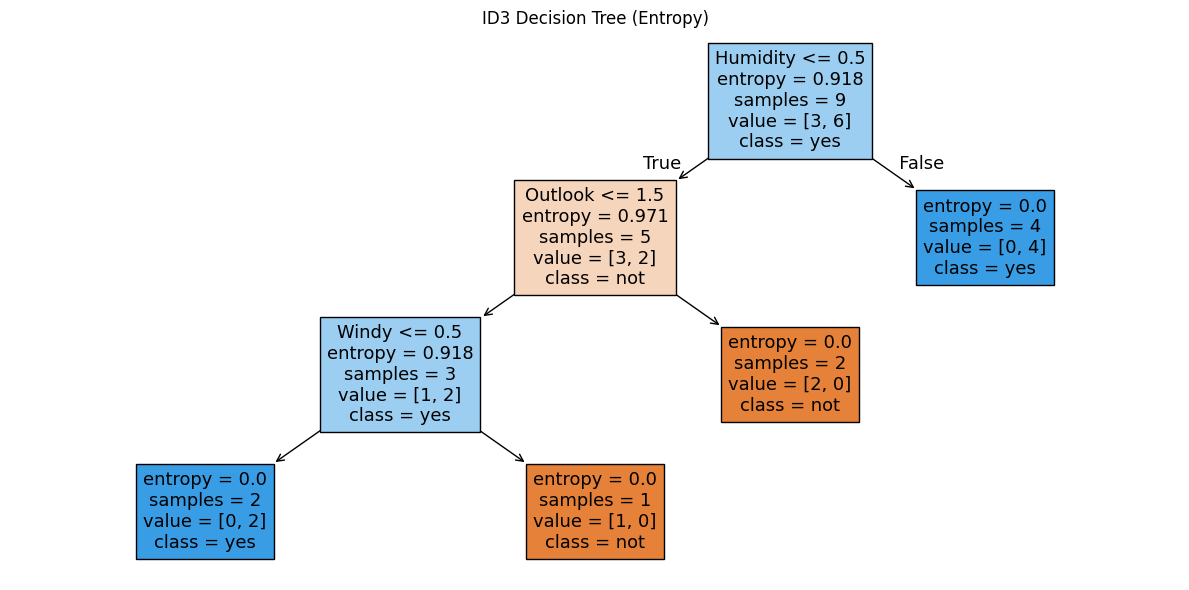

In [ ]:
id3_clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
id3_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(id3_clf, feature_names=X.columns, class_names=["not", "yes"], filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.tight_layout()
plt.show()

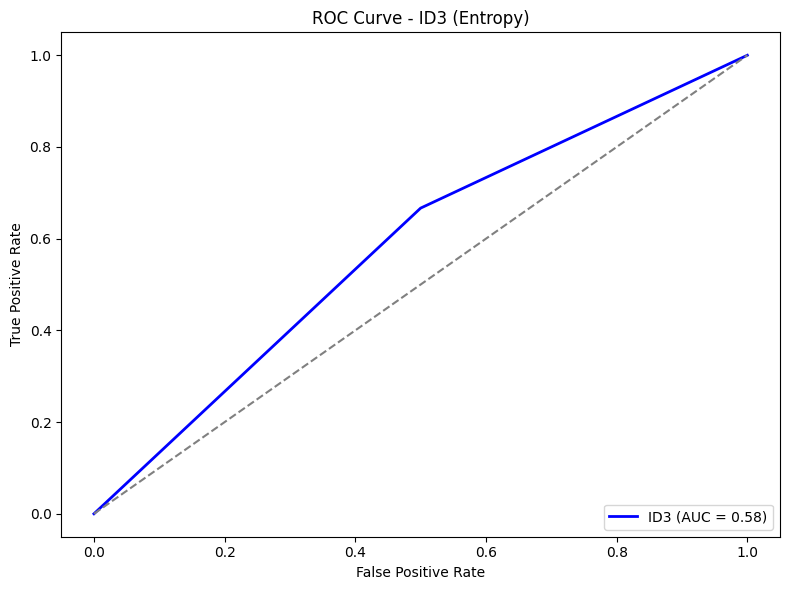

In [ ]:
y_scores_id3 = id3_clf.predict_proba(X_test)[:, 1]
fpr_id3, tpr_id3, _ = roc_curve(y_test, y_scores_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)

plt.figure(figsize=(8, 6))
plt.plot(fpr_id3, tpr_id3, color='blue', lw=2, label=f'ID3 (AUC = {roc_auc_id3:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ID3 (Entropy)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# CART decision tree (Gini index-based)

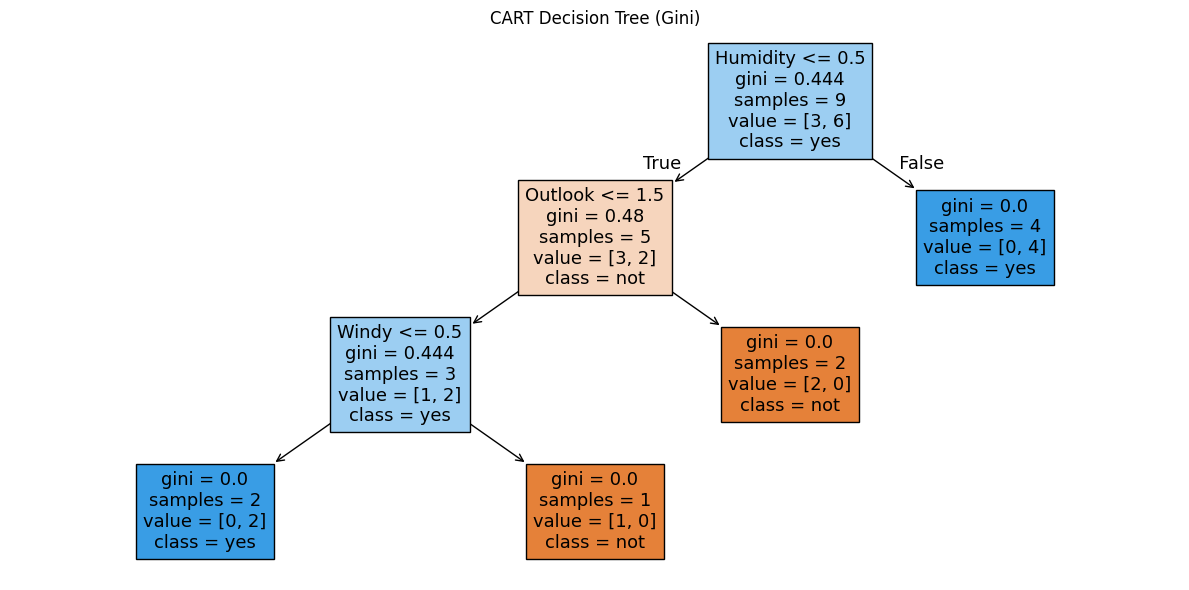

In [ ]:
cart_clf = DecisionTreeClassifier(criterion="gini", random_state=42)
cart_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(cart_clf, feature_names=X.columns, class_names=["not", "yes"], filled=True)
plt.title("CART Decision Tree (Gini)")
plt.tight_layout()
plt.show()

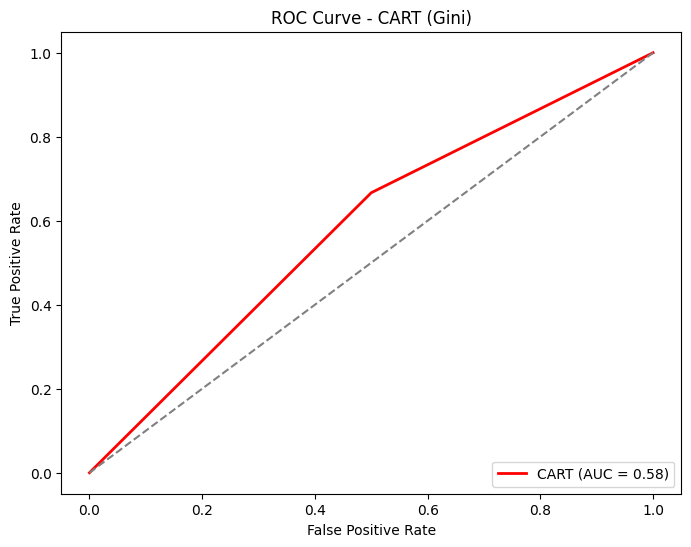

In [ ]:
y_scores_cart = cart_clf.predict_proba(X_test)[:, 1]
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_scores_cart)
roc_auc_cart = auc(fpr_cart, tpr_cart)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cart, tpr_cart, color='red', lw=2, label=f'CART (AUC = {roc_auc_cart:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CART (Gini)')
plt.legend(loc='lower right')
plt.show()